In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [2]:
length = 10.220303457786414

def load_profess_den(den_file):
    with open(den_file, 'r') as f:
        temp = f.readline().split()
        dim_x = int(temp[1])
        dim_y = int(temp[3])
        dim_z = int(temp[5])
        den = np.array(temp[10:], dtype=np.float_).reshape((dim_z, dim_x, dim_y))
        return den

def load_abacus_den(den_file):
    den = np.loadtxt(den_file, skiprows=21).reshape(54,54,54)
    return den

In [3]:
files = ['./KS-BLPS/OUT.blpstest/SPIN1_CHG','./WT/cd/Si.den','./HC//cd/Si.den','./1PROFESS_KERNEL//cd/Si.den','./4PROFESS_KERNEL//cd/Si.den','./7PROFESS_KERNEL//cd/Si.den','./10PROFESS_KERNEL/cd/Si.den']
labels = ['KS-BLPS', 'WT', 'HC', r'$\rm{TKK}^{\rm{m}}_{\rm{8}}$', r'$\rm{TKK}^{\rm{m}}_{\rm{12}}$', r'$\rm{TKK}^{\rm{m}}_{\rm{16}}$', r'$\rm{TKK}^{\rm{m}}_{\rm{20}}$']

ks = load_abacus_den(files[0])
wt = load_profess_den(files[1])
hc = load_profess_den(files[2])
tkk8 = load_profess_den(files[3])
tkk12 = load_profess_den(files[4])
tkk16 = load_profess_den(files[5])
tkk20 = load_profess_den(files[6])

data = [
    ks,
    wt,
    hc,
    tkk8,
    tkk12,
    tkk16,
    tkk20
]

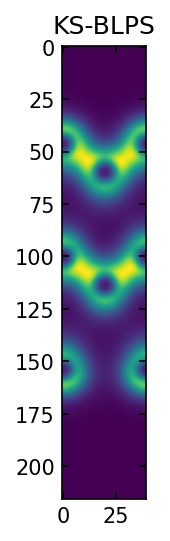

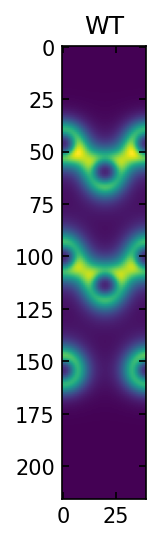

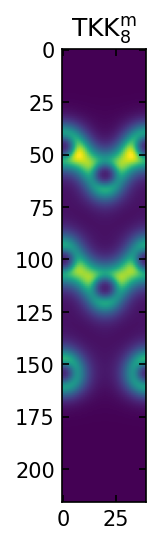

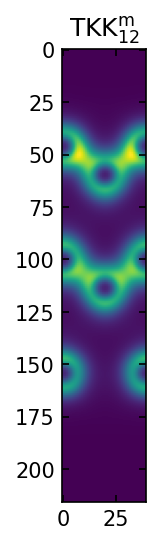

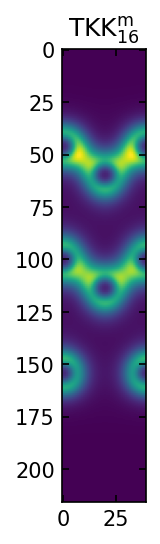

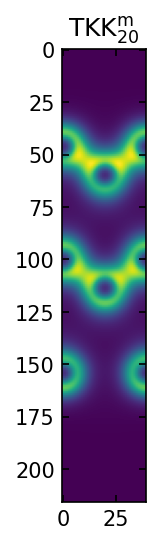

In [19]:
for i, each in enumerate(files):
    if 'KS' in each:
        den = load_abacus_den(each)
        plt.figure(dpi=150)
        plt.imshow(np.vstack((den[170:,0,:],den[:170,0,:])))
        plt.title(labels[i])
        plt.show()
    elif 'HC' in each:
        continue
    else:
        den = load_profess_den(each)
        plt.figure(dpi=150)
        plt.imshow(np.vstack((den[170:,0,:],den[:170,0,:])))
        plt.title(labels[i])
        plt.show()

0.004243448084711042 -0.004243448084711042


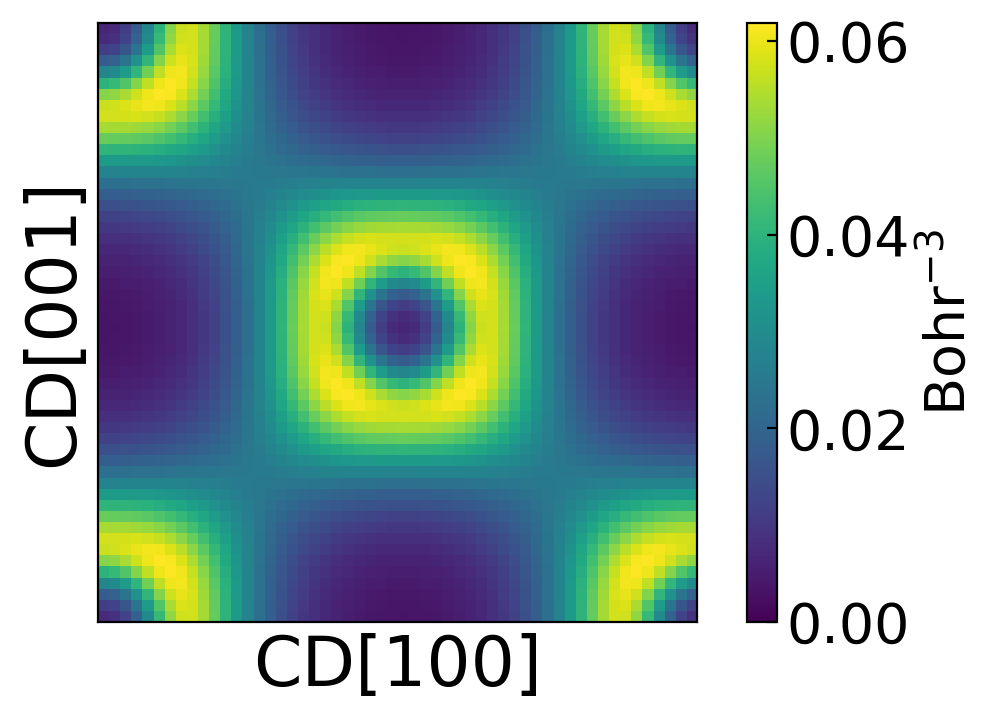

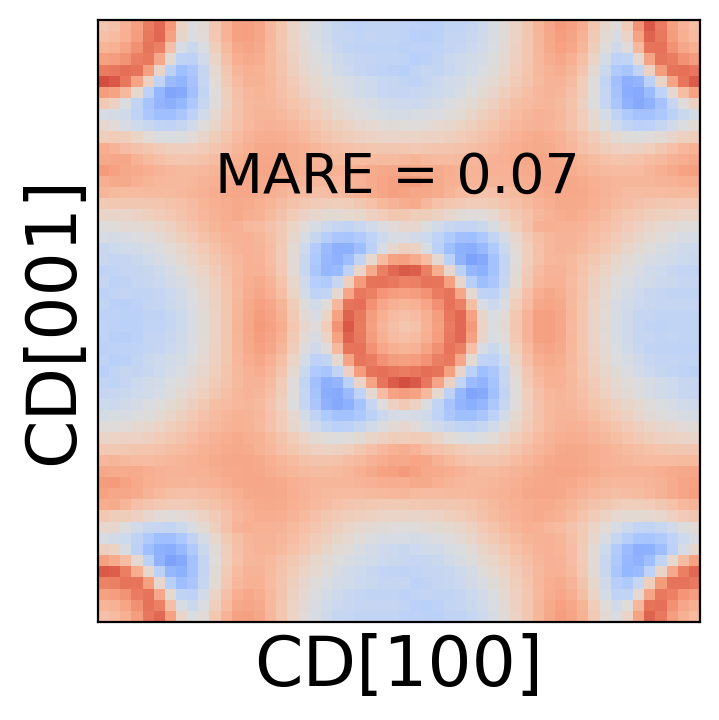

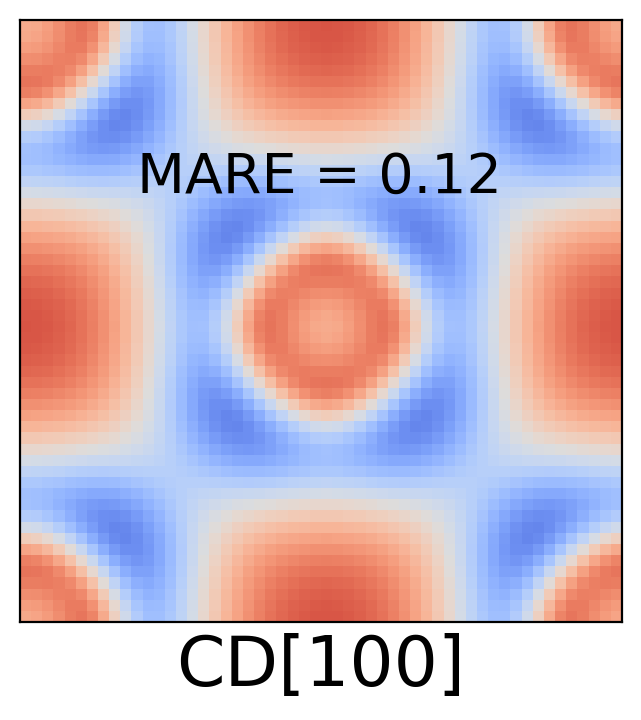

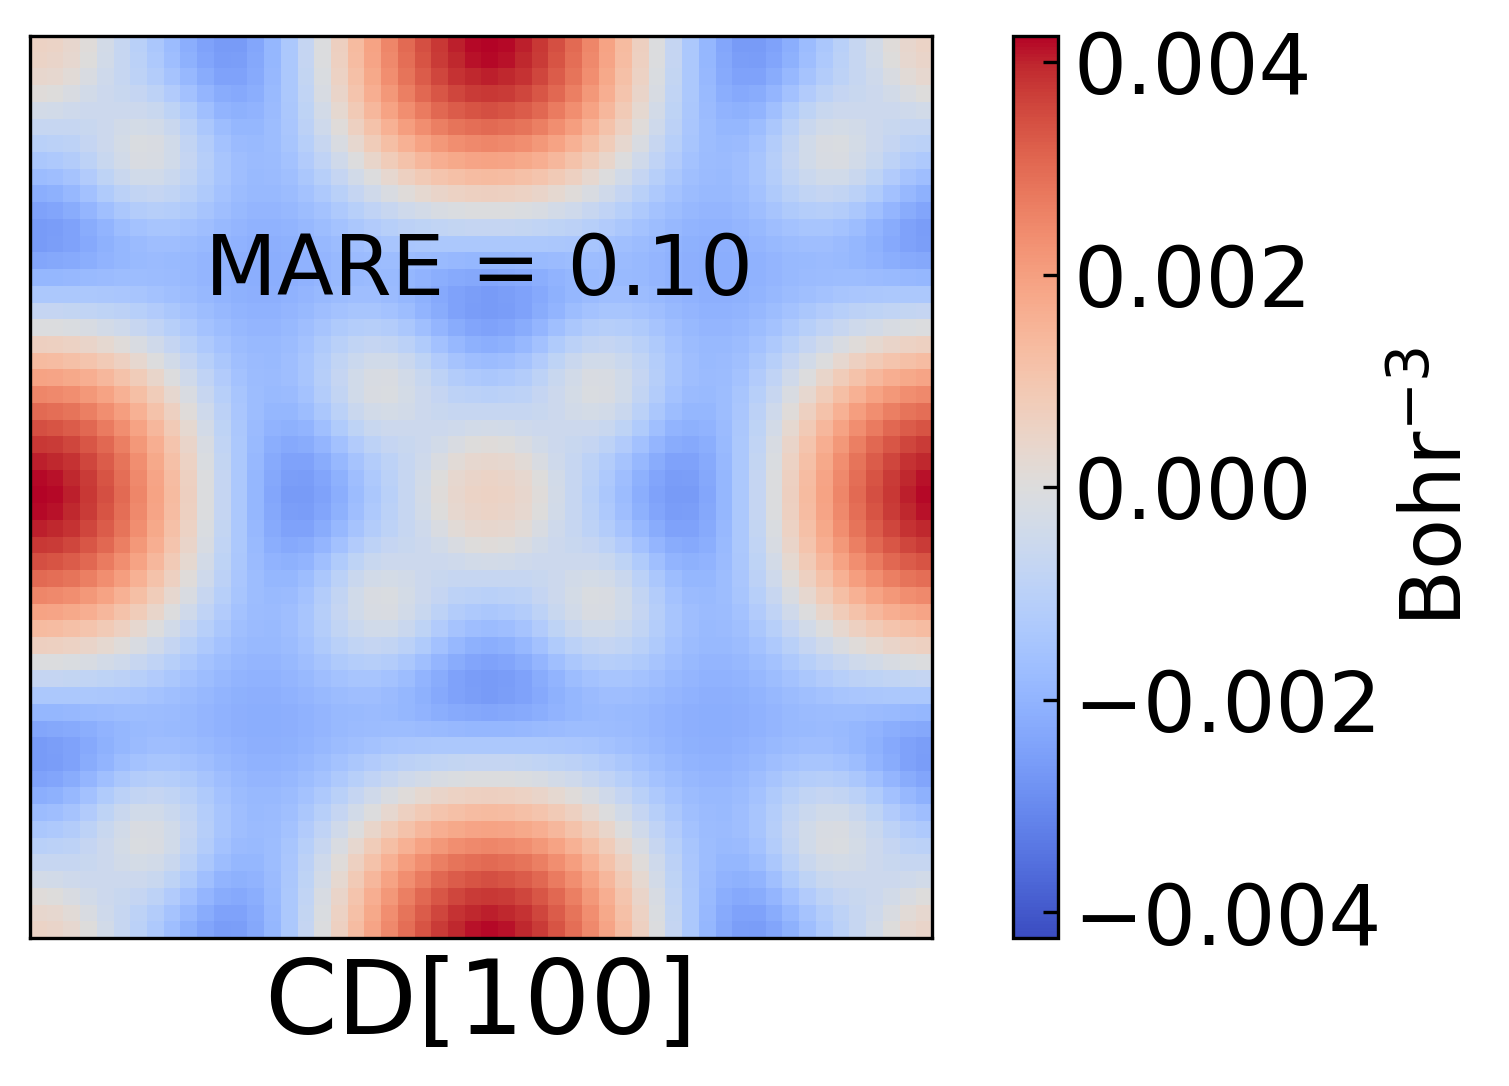

In [36]:
max1 = np.max(np.vstack([ks[:,0,:]]))
# min1 = np.min(np.vstack([ks[:,0,:]]))
min1 = 0.
max2 = np.max(np.vstack([np.abs(ks[:,0,:] - wt[:,0,:]), np.abs(ks[:,0,:] - tkk16[:,0,:]), np.abs(ks[:,0,:] - hc[:,0,:])]))
min2 = -max2
print(max2,min2)

n = 4

# fig = plt.figure(figsize=(16,4), constrained_layout=True)
# fig = plt.figure(figsize=(17,4), constrained_layout=False)
# gs = plt.GridSpec(1,2+4*n,figure=fig)

plt.figure(dpi=200)
# plt.subplot(gs[0,0:n + 1])
plt.imshow(ks[:,0,:])
plt.clim(min1, max1)
plt.yticks([])
plt.xticks([])
plt.ylabel('CD[001]', fontsize=25)
plt.xlabel('CD[100]', fontsize=25)
# plt.title('KS-BLPS', fontsize=25)
plt.rcParams['font.size'] = 20
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')
plt.tight_layout()

# plt.subplot(1,5,2)
# plt.imshow(np.vstack((wt[:,0,:],wt[:,0,:])))
# plt.clim(min1, max1)

# plt.subplot(1,5,3)
# plt.imshow(np.vstack((tkk16[:,0,:],tkk16[:,0,:])))
# plt.clim(min1, max1)
# plt.subplot(gs[2])

plt.figure(dpi=200)
# plt.subplot(gs[0,n + 1:2 * n + 1])
plt.imshow(hc[:,0,:] - ks[:,0,:], cmap=cm.coolwarm)
plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(hc-ks)/ks), fontsize=20)
# plt.text(17, 15, "MARE = %.2f" % np.mean(np.abs(hc-ks)/ks), fontsize=12)
plt.yticks([])
plt.xticks([])
plt.ylabel('CD[001]', fontsize=25)
plt.xlabel('CD[100]', fontsize=25)
plt.clim(min2, max2)
plt.tight_layout()
# plt.title('HC $-$ KS-BLPS', fontsize=25)

plt.figure(dpi=200)
# plt.subplot(gs[0,2*n+1:3*n+1])
plt.imshow(wt[:,0,:] - ks[:,0,:], cmap=cm.coolwarm)
plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(wt-ks)/ks), fontsize=20)
# plt.text(17, 15, "MARE = %.2f" % np.mean(np.abs(wt-ks)/ks), fontsize=12)
plt.yticks([])
plt.xticks([])
plt.xlabel('CD[100]', fontsize=25)
plt.clim(min2, max2)
plt.tight_layout()
# plt.title('WT $-$ KS-BLPS', fontsize=25)

plt.figure(dpi=300)
# plt.subplot(gs[0,3*n+1:4*n+2])
plt.imshow(tkk16[:,0,:] - ks[:,0,:], cmap=cm.coolwarm)
plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=20)
# plt.text(17, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=12)
plt.yticks([])
plt.xticks([])
plt.xlabel('CD[100]', fontsize=25)
plt.clim(min2, max2)
# plt.title(r'$\rm{TKK}^{\rm{s}}_{\rm{16}}$ $-$ KS-BLPS', fontsize=25)
plt.tight_layout()
plt.rcParams['font.size'] = 20
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


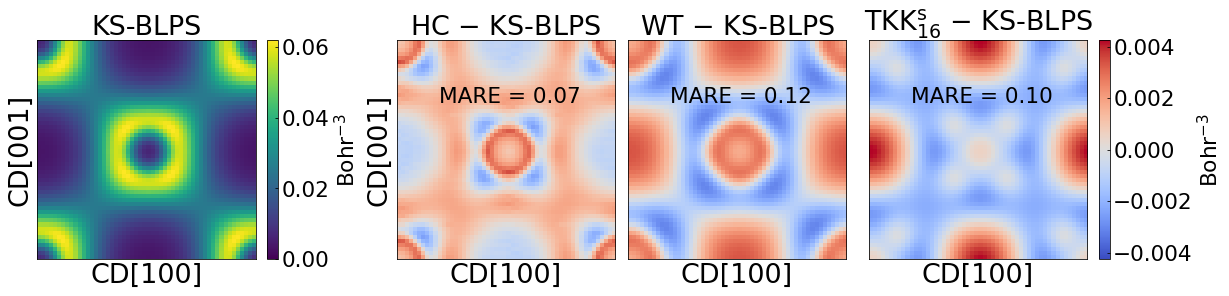

In [47]:
max1 = np.max(np.vstack([ks[:,0,:]]))
min1 = 0.
max2 = np.max(np.vstack([np.abs(ks[:,0,:] - wt[:,0,:]), np.abs(ks[:,0,:] - tkk16[:,0,:]), np.abs(ks[:,0,:] - hc[:,0,:])]))
min2 = -max2

n = 35

# fig = plt.figure(figsize=(16,4), constrained_layout=True)
fig = plt.figure(figsize=(17,4), constrained_layout=True)
gs = plt.GridSpec(1,2+4*n,figure=fig)

plt.subplot(gs[0,0:n + 1])
plt.imshow(ks[:,0,:])
plt.clim(min1, max1)
plt.yticks([])
plt.xticks([])
plt.ylabel('CD[001]', fontsize=27)
plt.xlabel('CD[100]', fontsize=27)
plt.title('KS-BLPS', fontsize=27)
plt.rcParams['font.size'] = 21.6
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')
plt.tight_layout()

# plt.subplot(1,5,2)
# plt.imshow(np.vstack((wt[:,0,:],wt[:,0,:])))
# plt.clim(min1, max1)

# plt.subplot(1,5,3)
# plt.imshow(np.vstack((tkk16[:,0,:],tkk16[:,0,:])))
# plt.clim(min1, max1)
# plt.subplot(gs[2])

plt.subplot(gs[0,n + 1:2 * n + 1])
plt.imshow(hc[:,0,:] - ks[:,0,:], cmap=cm.coolwarm)
# plt.text(10, 15, "MAE = %.1e" % np.mean(np.abs(hc-ks)), fontsize=21.6)
plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(hc-ks)/ks), fontsize=21.6)
plt.yticks([])
plt.xticks([])
plt.ylabel('CD[001]', fontsize=27)
plt.xlabel('CD[100]', fontsize=27)
plt.clim(min2, max2)
plt.title('HC $-$ KS-BLPS', fontsize=27)

plt.subplot(gs[0,2*n+1:3*n+1])
plt.imshow(wt[:,0,:] - ks[:,0,:], cmap=cm.coolwarm)
# plt.text(10, 15, "MAE = %.1e" % np.mean(np.abs(wt-ks)), fontsize=21.6)
plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(wt-ks)/ks), fontsize=21.6)
plt.yticks([])
plt.xticks([])
plt.xlabel('CD[100]', fontsize=27)
plt.clim(min2, max2)
plt.title('WT $-$ KS-BLPS', fontsize=27)

plt.subplot(gs[0,3*n+1:4*n+2])
plt.imshow(tkk16[:,0,:] - ks[:,0,:], cmap=cm.coolwarm)
# plt.text(10, 15, "MAE = %.1e" % np.mean(np.abs(tkk16-ks)), fontsize=21.6)
plt.text(10, 15, "MARE = %.2f" % np.mean(np.abs(tkk16-ks)/ks), fontsize=21.6)
plt.yticks([])
plt.xticks([])
plt.xlabel('CD[100]', fontsize=27)
plt.clim(min2, max2)
plt.title(r'$\rm{TKK}^{\rm{s}}_{\rm{16}}$ $-$ KS-BLPS', fontsize=27)
plt.rcParams['font.size'] = 21.6
plt.colorbar(label=r'$\rm{Bohr}^{-3}$')

# plt.subplot(gs[7])

In [11]:
for i, each in enumerate(data):
    print(labels[i] + ":")
    print(np.mean(np.abs(each - ks)))

KS-BLPS:
0.0
WT:
0.0018268673234779734
HC:
0.0018836158919533367
$\rm{TKK}^{\rm{m}}_{\rm{8}}$:
0.001712061112580495
$\rm{TKK}^{\rm{m}}_{\rm{12}}$:
0.0021019166759549414
$\rm{TKK}^{\rm{m}}_{\rm{16}}$:
0.0017761218027319253
$\rm{TKK}^{\rm{m}}_{\rm{20}}$:
0.0015945457315168522


In [ ]:
$c_1$    &$3.15274$e-3   &$1.19734$e-3   &$5.48093$e-4   &$3.30735$e-3   &$1.93888$e-3   &$7.61877$e-4\\
$c_2$    &$1.65886$e-4   &$2.83447$e-3   &$1.44417$e-3   &$9.39512$e-4   &$3.46579$e-3   &$2.49824$e-3\\
$c_3$    &$-4.91858$e-3  &$8.69688$e-4   &$2.57833$e-3   &$-2.36730$e-2  &$1.61192$e-3   &$2.16296$e-3\\
$c_4$    &$-3.36048$e-3  &$-8.03775$e-3  &$-3.63401$e-7  &$3.76058$e-2   &$-1.30013$e-2  &$1.32278$e-3\\
$c_5$    &$-3.82667$e-3  &$3.38437$e-3   &$-3.92908$e-3  &$2.14557$e-2   &$-1.73982$e-3  &$-5.87812$e-3\\
$c_6$    &$-1.47054$e-2  &$-1.87532$e-3  &$-4.04051$e-3  &$-6.63402$e-4  &$-5.63089$e-3  &$-1.06169$e-2\\
$c_7$    &$-1.38724$e-2  &$-1.55350$e-2  &$-1.46224$e-3  &$1.13403$e-1   &$-3.84815$e-2  &$2.08889$e-3\\
$c_8$    &$1.87566$e-2   &$1.47871$e-2   &$5.88883$e-3   &$-7.51445$e-2  &$4.08864$e-2   &$5.79804$e-3\\